Predicting Chronic Disease using Classification Models

CKD is an irreversible and progressive disease that is associated with a plethora of serious diseases. The deterioration of renal function here ultimately leads to death and as such it is imperative we identify key features of this disease to help inform clinical decisions.

In [1]:
# Import the libraries needed for the analysis of the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset and let's have a look at the first five rows
df = pd.read_csv('/kaggle/input/chronic-kidney-disease-dataset-analysis/Chronic_Kidney_Dsease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


### Exploratory Data Analysis

In [3]:
# let's begin by taking a sneak peek of our dataset
df.shape

(1659, 54)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [5]:
# check for missing values
df.isnull().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCal

In [6]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


Diagnosis
1    1524
0     135
Name: count, dtype: int64


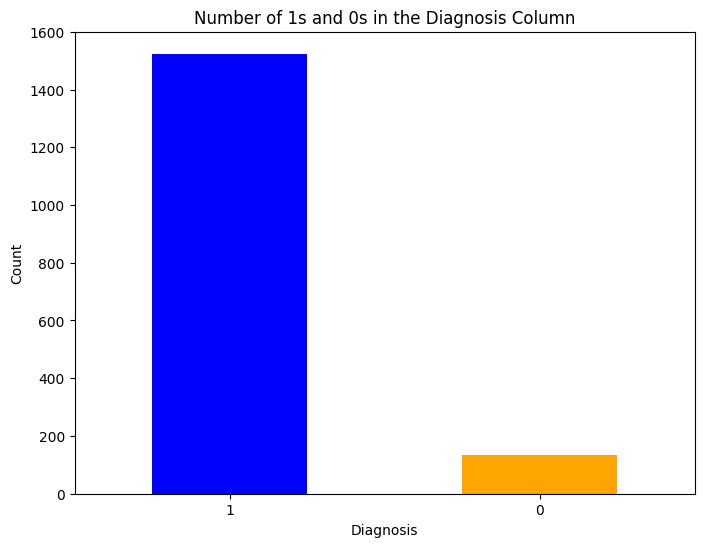

In [7]:
# The diagnosis class is particular important to us. let's see the members of the 2 groups
print(df['Diagnosis'].value_counts())

# Count the number of 1s and 0s in the Diagnosis column
diagnosis_counts = df['Diagnosis'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of 1s and 0s in the Diagnosis Column')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[1, 0], labels=['0', '1'], rotation=0)
plt.show()

In [ ]:
# This is a very imbalanced class and downstream analysis will require techniques like SMOTE or ENN or Not

In [8]:
!pip install imbalanced-learn

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
# Separate features and target
X = df.drop(['Diagnosis', 'PatientID', 'DoctorInCharge'], axis=1)
y = df['Diagnosis']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Diagnosis'] = y_resampled

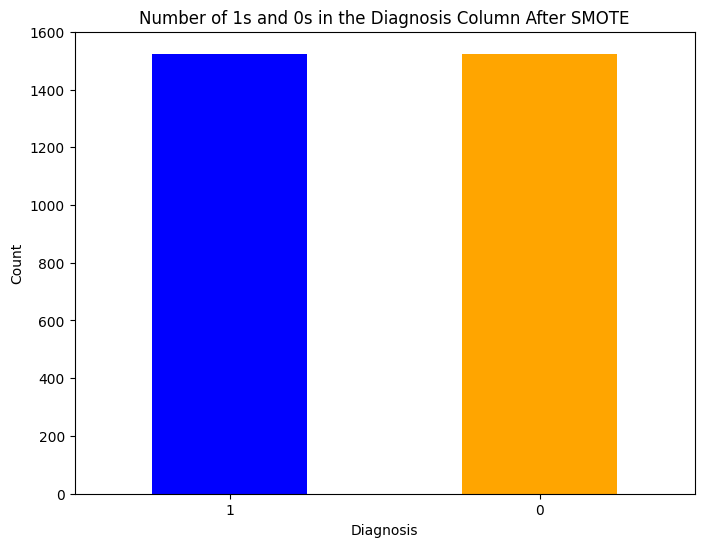

Diagnosis
1    1524
0    1524
Name: count, dtype: int64


In [11]:
# Count the number of 1s and 0s in the Diagnosis column after resampling
diagnosis_counts_resampled = df_resampled['Diagnosis'].value_counts()

# Plot the bar graph for resampled data
plt.figure(figsize=(8, 6))
diagnosis_counts_resampled.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of 1s and 0s in the Diagnosis Column After SMOTE')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[1, 0], labels=['0', '1'], rotation=0)
plt.show()

# Print the count of each class after resampling
print(diagnosis_counts_resampled)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


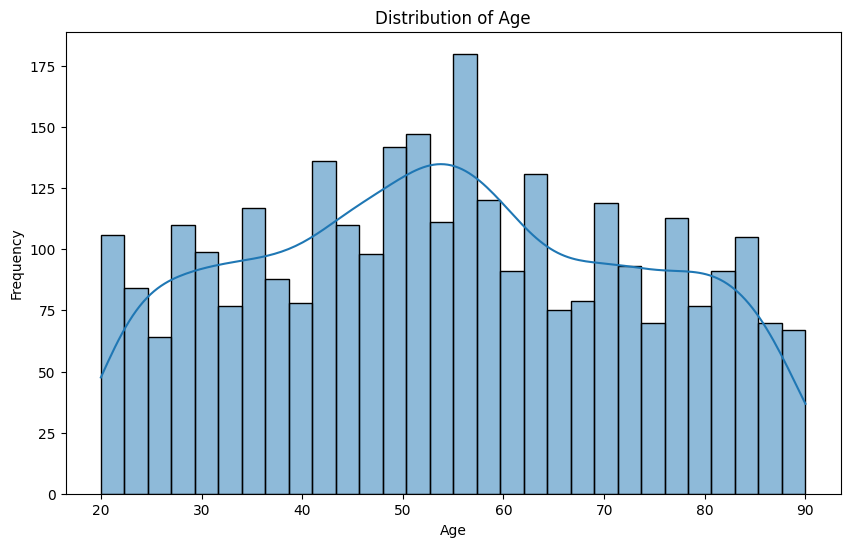

In [12]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df_resampled['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

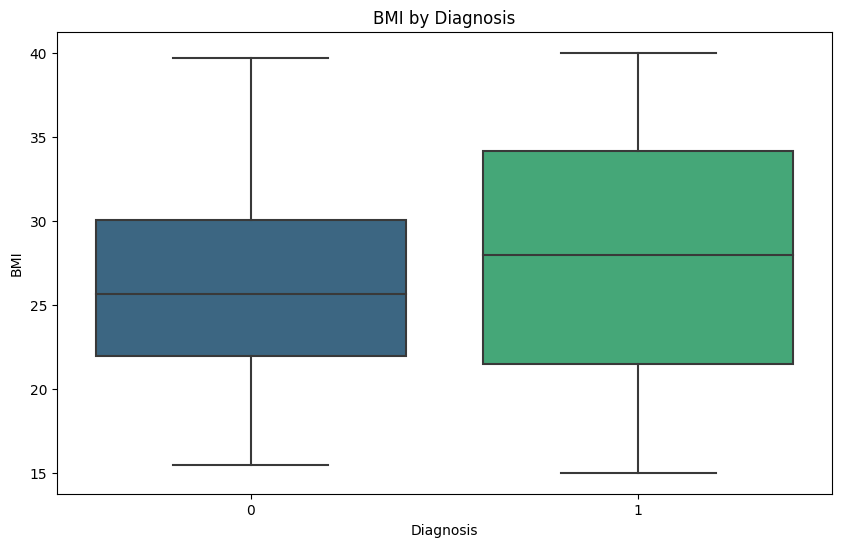

In [13]:
# Box plot of BMI by Diagnosis using the resampled dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='BMI', data=df_resampled, palette='viridis')
plt.title('BMI by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.show()

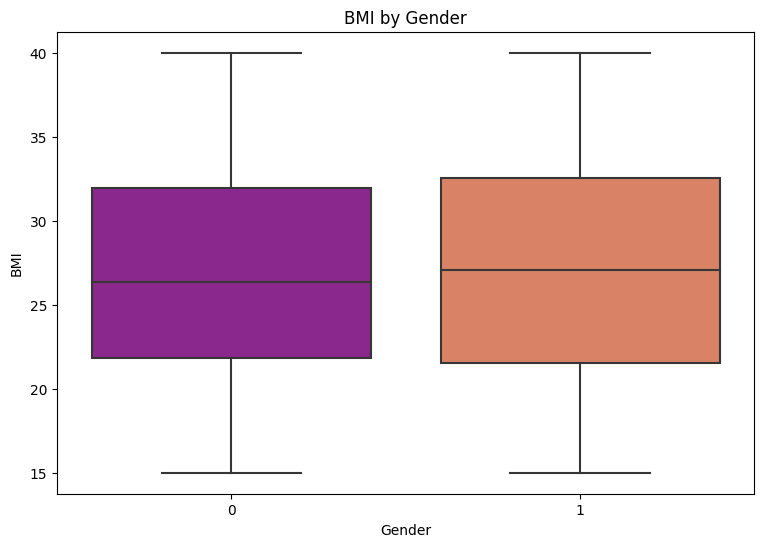

In [14]:
# Box plot of BMI by Gender using the resampled dataset
plt.figure(figsize=(9, 6))
sns.boxplot(x='Gender', y='BMI', data=df_resampled, palette='plasma')
plt.title('BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

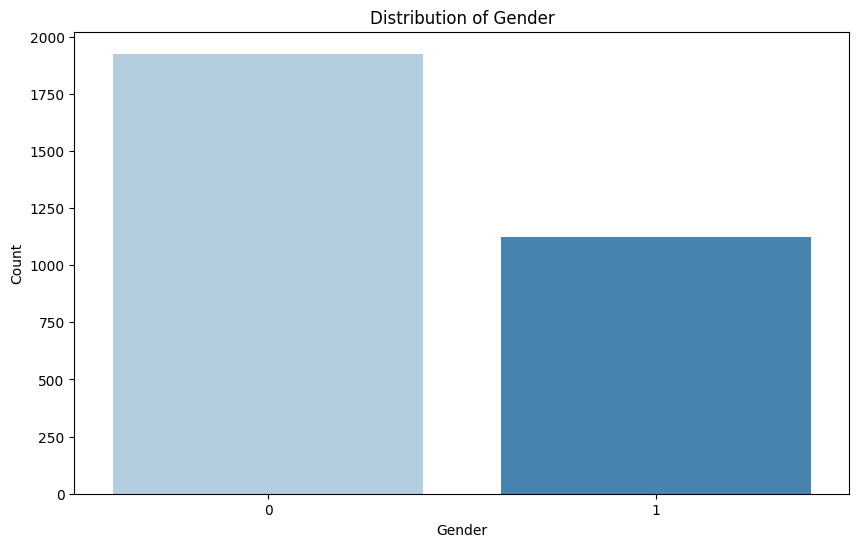

In [15]:
# Count plot of Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_resampled, palette='Blues')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

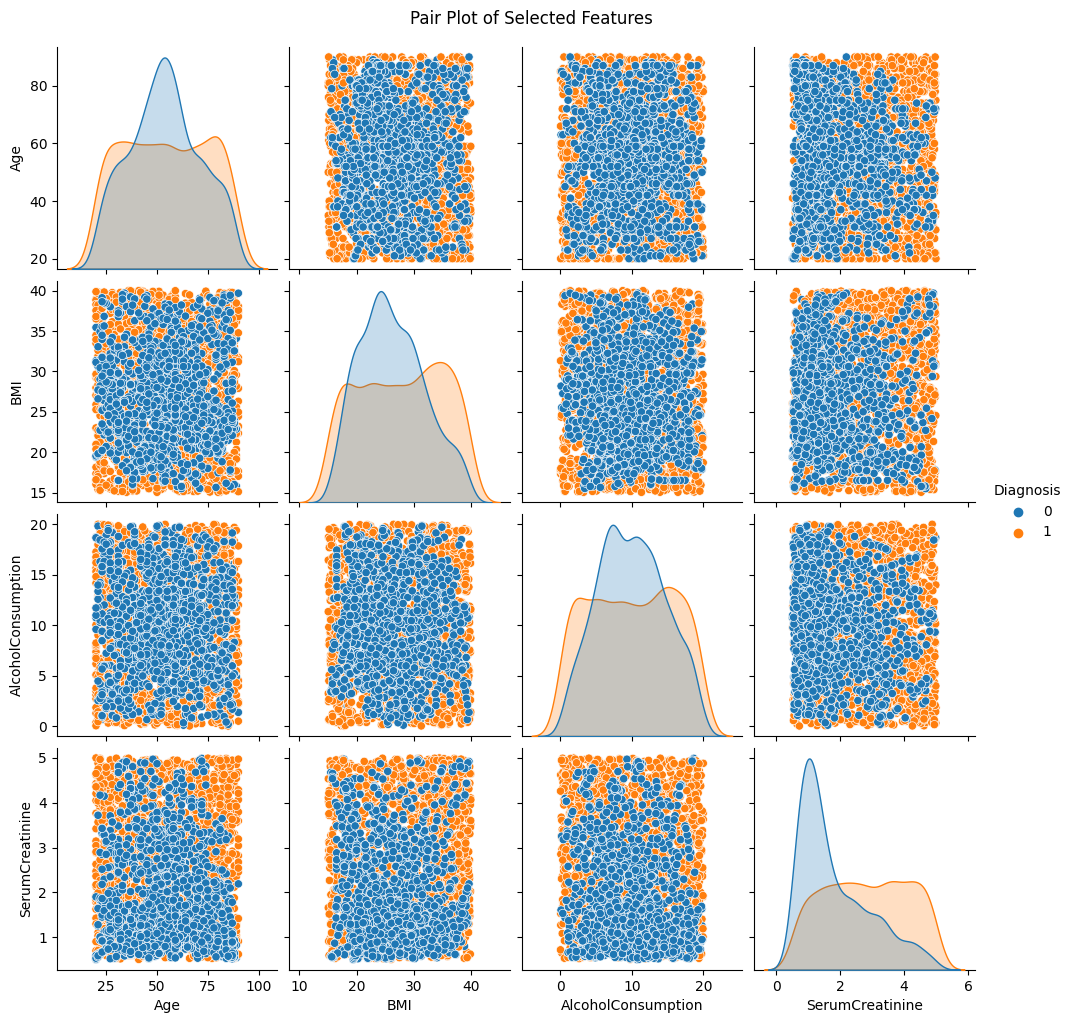

In [16]:
# Pair plot for some selected features
selected_features = ['Age', 'BMI', 'AlcoholConsumption', 'SerumCreatinine', 'Diagnosis']
sns.pairplot(df_resampled[selected_features], hue='Diagnosis', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [17]:
df_resampled.shape

(3048, 52)

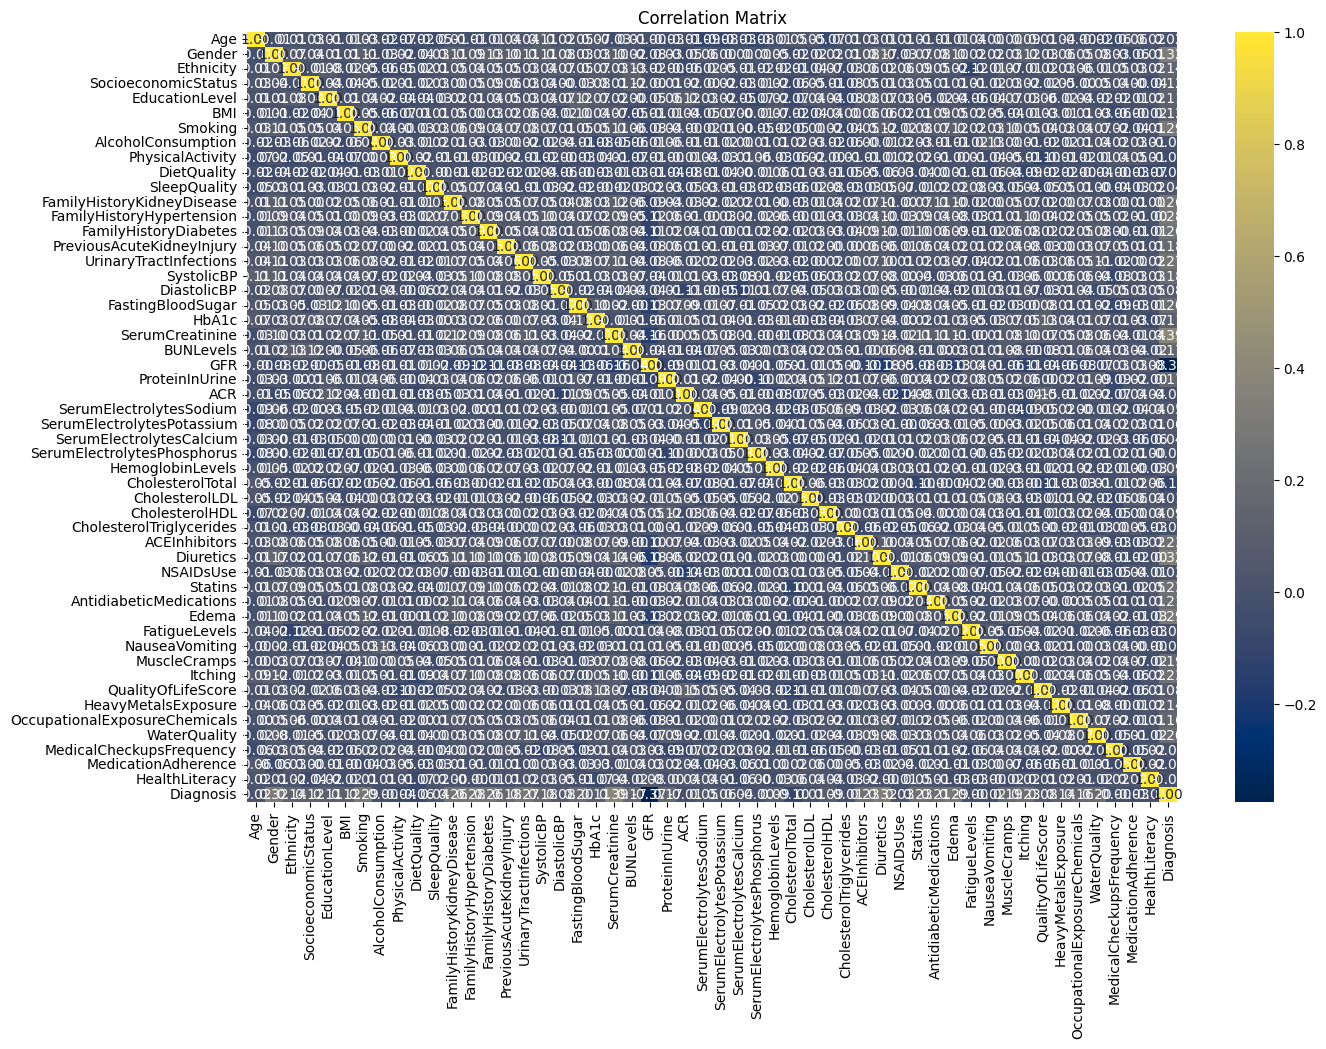

In [18]:
# correlation matrix and a heatmap will help to identify features highly correlated with the target variable - Diagnosis
correlation_matrix = df_resampled.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='cividis')
plt.title('Correlation Matrix')
plt.show()

### Fitting a ML Model to the dataset

In [19]:
# import our old friends
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

In [20]:
# Prepare the data using the resampled dataset
X_resampled = df_resampled.drop(columns=['Diagnosis'])
y_resampled = df_resampled['Diagnosis']

# Standardization
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Split the dataset to obtain the training and testing components
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

## Random Forest Classifier

In [21]:
# fitting a random forest classifier to our dataset
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predict on the test data
y_pred_1 = model_1.predict(X_test)

# Evaluate the model
print(f"Confusion Matrix for {model_1}:")
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

Confusion Matrix for RandomForestClassifier(random_state=42):
[[291   6]
 [ 11 302]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       297
           1       0.98      0.96      0.97       313

    accuracy                           0.97       610
   macro avg       0.97      0.97      0.97       610
weighted avg       0.97      0.97      0.97       610



In [23]:
accuracy_rf = accuracy_score(y_test, y_pred_1)
print(f'Accuracy from the random forest model is {accuracy_rf}')

AUC_rf = roc_auc_score(y_test, y_pred_1)
print(f'The AUC score from the random forest classifier is {AUC_rf}')

Accuracy from the random forest model is 0.9721311475409836
The AUC score from the random forest classifier is 0.9723271049149642


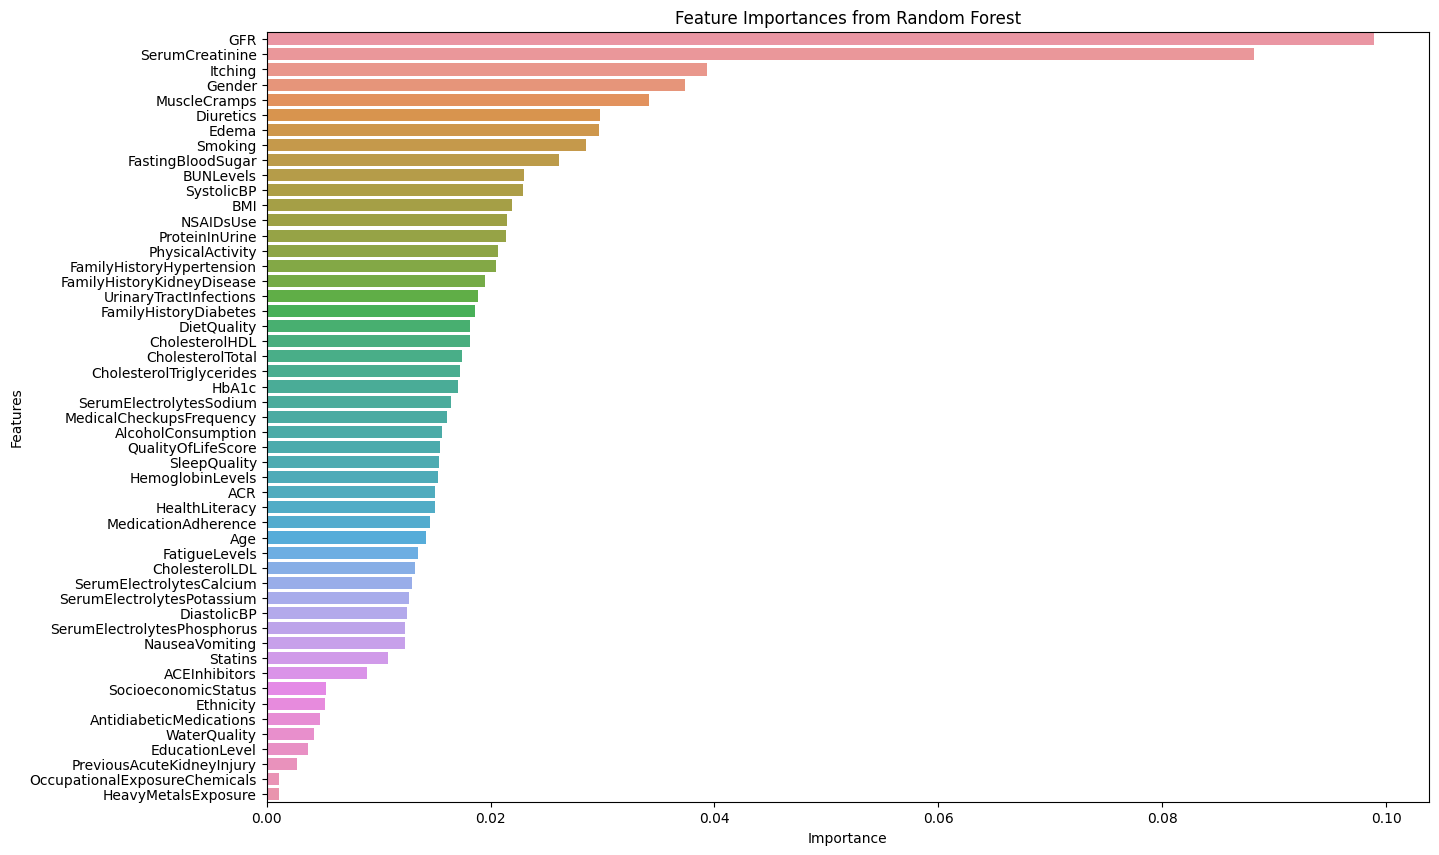

In [24]:
# Get feature importances
feature_importances = pd.DataFrame(model_1.feature_importances_, index=X_resampled.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [25]:
# Perform scaling on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# hyperparams tuning of the Random Forest Classifier

model = model_1
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with correct inputs
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.9708806005318611


## Logistic Regression

In [26]:
# Train a logistic regression model
model_2 = LogisticRegression(random_state=42)
model_2.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [27]:
# Predict on the test data
y_pred_2 = model_2.predict(X_test)

# Evaluate the model
print(f"Confusion Matrix for {model_2}:")
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

Confusion Matrix for LogisticRegression(random_state=42):
[[267  30]
 [ 31 282]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       297
           1       0.90      0.90      0.90       313

    accuracy                           0.90       610
   macro avg       0.90      0.90      0.90       610
weighted avg       0.90      0.90      0.90       610



In [28]:
accuracy_lr = accuracy_score(y_test, y_pred_2)
print(f'Accuracy from the logistic regression model is {accuracy_lr}')

AUC_lr = roc_auc_score(y_test, y_pred_2)
print(f'The AUC score from the logistic regression is {AUC_lr}')

Accuracy from the logistic regression model is 0.9
The AUC score from the logistic regression is 0.8999741827217865


In [29]:
# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=20)

# Transform (i.e.: run selection on) the training data
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)

In [30]:
X_train_kbest.shape

(2438, 20)

In [31]:
# Fit model to the transformed data
lm_kbest = LogisticRegression()
lm_kbest.fit(X_train_kbest, y_train)

LogisticRegression()

In [32]:
# Before generating predictions, we'll need to transform the test data the same way we did the train data
X_test_kbest = selector_kbest.transform(X_test)

# Generate predictions from kbest model
pred_lm_kbest = lm_kbest.predict(X_test_kbest)

In [33]:
print('KBest Model:')
print(classification_report(y_test, pred_lm_kbest))

print(f"Confusion Matrix for {model_2}:")
print(classification_report(y_test, y_pred_2))

KBest Model:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       297
           1       0.90      0.89      0.89       313

    accuracy                           0.89       610
   macro avg       0.89      0.89      0.89       610
weighted avg       0.89      0.89      0.89       610

Confusion Matrix for LogisticRegression(random_state=42):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       297
           1       0.90      0.90      0.90       313

    accuracy                           0.90       610
   macro avg       0.90      0.90      0.90       610
weighted avg       0.90      0.90      0.90       610



The logistic regression which selected the best 20 features did not necessarily perform better on the dataset than the logistic regression which was fitted on the entire dataset (Accuracy score of 89% vs 90%).

Overall, the random forest classifier performed better than the logistic regression after applying SMOTE
### Before SMOTE, random forest performed worst and kbest selector performed better than logistic regression model.